# Kmeans-Clustering
2020-03-02

### k-means clustering 이란
KMeans 클러스터링 알고리즘은 n개의 중심점을 찍은 후에, <br>
이 중심점에서 각 점간의 거리의 합이 가장 최소화가 되는 중심점 n의 위치를 찾고,<br>
이 중심점에서 가까운 점들을 중심점을 기준으로 묶는 클러스터링 알고리즘이다.

> **[ k-means clustering 단점 ]** <br>
K Means 알고리즘은 사용이 편하고 속도가 비교적 빠른 알고리즘인데 비해서 몇가지 문제점을 가지고 있다. <br>
먼저 클러스터의 수를 정해줘야 하고, 결정적으로 K Means에서는 중심점을 측정할때 처음에 랜덤으로 중심점의 위치를 찾기 때문에,  <br>
잘못하면, 중심점과 점간의 거리가 Global optimum 인 최소 값을 찾는 게 아니라 <br>
중심점이 Local optimum 에 에 수렴하여 잘못된 분류를 할 수 있다는 취약점을 가지고 있다.


### 1. 적정 K수 찾기
*  Inertia value 를 사용해서 적절한 군집 수를 찾는다.
    * Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값이다.<br>
    이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.


### 2. Data Scaling
* k-means 등 거리 기반의 모델에서는 스케일링이 매우 중요
> **< 스케일링의 종류 >**
    * StandardScaler :기본 스케일. 평균과 표준편차 사용
    * MinMaxScaler	: 최대/최소값이 각각 1, 0이 되도록 스케일링
        * 다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다
    * MaxAbsScaler	: 최대절대값과 0이 각각 1, 0이 되도록 스케일링
        * 즉 -1~1 사이로 재조정한다. 
        * 양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있다.
    * RobustScaler	: 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
        * StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시킬 수 있다.
        

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
import chart_studio.plotly as py
# import cufflinks as cf
from plotly.offline import plot
import plotly.express as px

In [3]:
# warning 무시
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
from sklearn.cluster import KMeans

#### 데이터 불러오기

In [5]:
df = pd.read_excel('./data/youtube_zuid_notzero.xlsx')

In [50]:
df=df.drop(['Unnamed: 0'],axis=1)

## 1-1) Data Scaling
*  이상치에 영향을 받지 않는 RobustScaler() 사용
   

In [63]:
df['cnt'].values.reshape(-1,1)

array([[105],
       [ 33],
       [ 97],
       ...,
       [272],
       [ 45],
       [  5]])

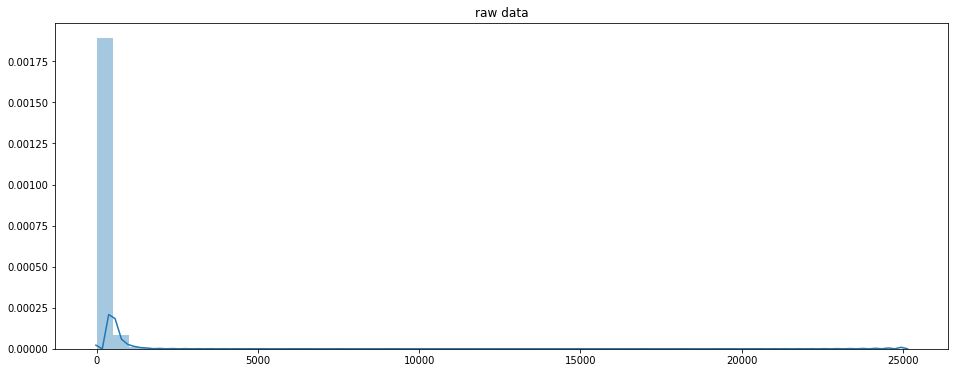

In [99]:
fig=plt.gcf()
fig.set_size_inches(16,6)
sns.distplot(df['cnt'].values.reshape(-1,1))
plt.title('raw data')
plt.show()

In [86]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(df['cnt'].values.reshape(-1,1)))
feature_click = robustScaler.transform(df['cnt'].values.reshape(-1,1))

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


In [87]:
feature_click

array([[ 0.2278481 ],
       [-0.2278481 ],
       [ 0.17721519],
       ...,
       [ 1.28481013],
       [-0.15189873],
       [-0.40506329]])

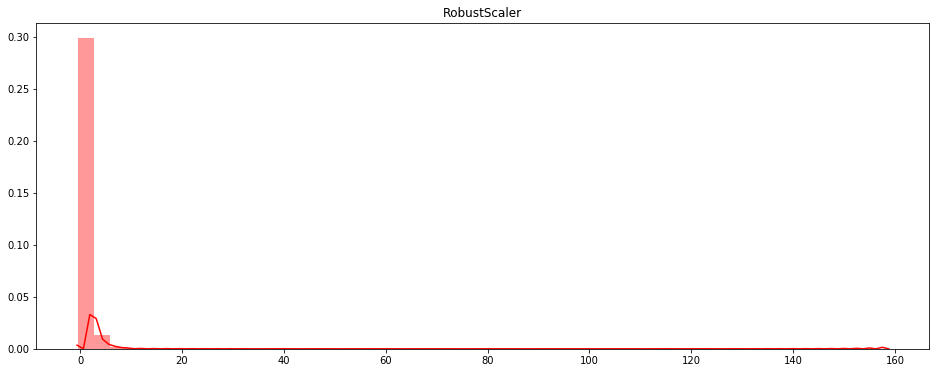

In [100]:
fig=plt.gcf()
fig.set_size_inches(16,6)
sns.distplot(feature_click,color="red")
plt.title('RobustScaler')
plt.show()

In [110]:
feature_click_log=np.log(df['cnt'].values.reshape(-1,1))
feature_click_log

array([[4.65396035],
       [3.49650756],
       [4.57471098],
       ...,
       [5.60580207],
       [3.80666249],
       [1.60943791]])

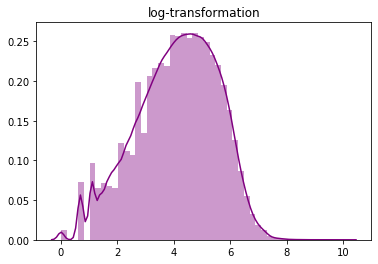

In [98]:
# 로그변환
sns.distplot(np.log(df['cnt'].values.reshape(-1,1)),color='purple')
plt.title('log-transformation')
plt.show()

## 1-2) 적정 군집 수 찾기
Inertia value를 이용한 적정 군집수 판단
* 데이터 정규화 : RobustScaler()

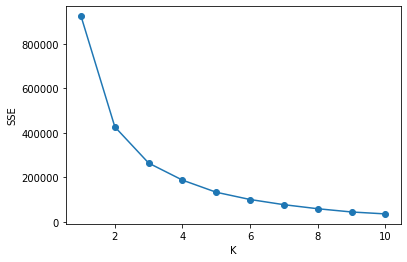

In [91]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(feature_click)

* 변곡점이 되는 지점에서 k 를 결정
    * 이 경우 4개의 그룹핑이 적당할 듯 

<로그변환 후 데이터>
* 로그변환 할 경우 Inertia value가 더 급격히 하강하는 형태를 띔
    * 적정 군집수가 더 줄어드는 경향

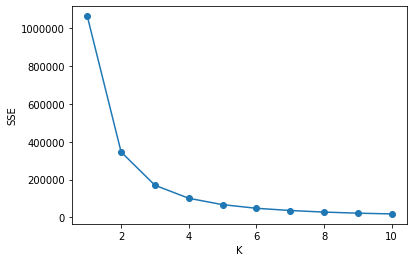

In [111]:
# log transformation
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(feature_click_log)

## 1-3) 클러스터링
* 적정 군집수 : 4개

In [ ]:
###### 로그변환 후
kmeans= KMeans(n_clusters=4,random_state=0).fit(feature_click_log)

In [116]:
# 값은 reshape해서 넣어야됨.
kmeans= KMeans(n_clusters=4,random_state=0).fit(feature_click)

In [12]:
kmeans.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [117]:
df['cluster_click']=kmeans.labels_

In [15]:
# total클릭으로 클러스터 돌렸을 때의 '클릭' 기초통계량
#df.groupby(['cluster_click'])['cnt'].describe()

In [118]:
import plotly.graph_objects as go
labels=['mid_b','low','mid_a','high']
#labels = list(df_zuid_notzero.groupby(['cluster_click'])['zuid'].count().index)
values=list(df.groupby(['cluster_click'])['zuid'].count().values)

fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=.3)])

fig.update_layout(
    title_text="1) 클러스터 그룹별 카운트")
# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [115]:
import plotly.graph_objects as go
labels=['mid_b','low','mid_a','high']
#labels = list(df_zuid_notzero.groupby(['cluster_click'])['zuid'].count().index)
values=list(df.groupby(['cluster_click'])['zuid'].count().values)

fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=.3)])

fig.update_layout(
    title_text="1) 클러스터 그룹별 카운트_로그변환")
# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

* 로그변환한 데이터로 클러스터 할 경우 좀 더 균등하게 그룹핑 되는것을 확인 
    * 하지만 원본 데이터의 특성이 무시되는 경향

---------------
## 2-1) Data-Scaling
* 이 데이터의 값 범위는 0~1 이므로, MinMaxScaler외에 다른 스케일링 방법 사용
    * RobustScaler()고려

In [67]:
df['youtube_prop'].values.reshape(-1,1)

array([[0.06],
       [0.03],
       [0.01],
       ...,
       [0.08],
       [0.02],
       [0.6 ]])

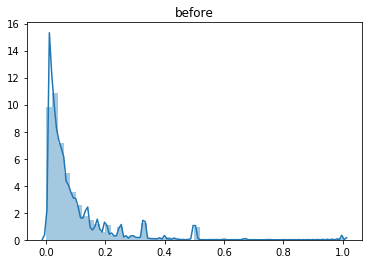

In [74]:
sns.distplot(df['youtube_prop'].values.reshape(-1,1))
plt.title('before')
plt.show()

In [16]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(df['youtube_prop'].values.reshape(-1,1)))
feature_yt = robustScaler.transform(df['youtube_prop'].values.reshape(-1,1))

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


In [17]:
feature_yt 

array([[ 0.125],
       [-0.25 ],
       [-0.5  ],
       ...,
       [ 0.375],
       [-0.375],
       [ 6.875]])

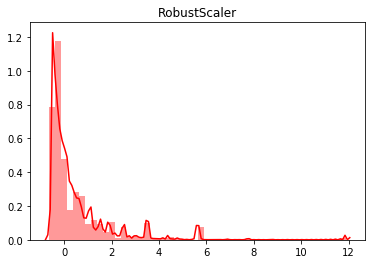

In [75]:
sns.distplot(feature_yt ,color='red')
plt.title('RobustScaler')
plt.show()

---------------
## 2-2) 적정 군집 수 찾기 


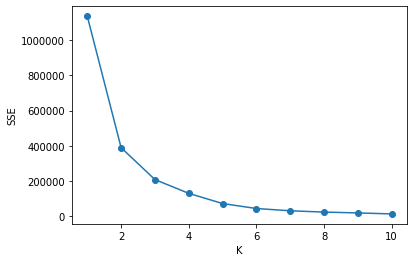

In [18]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(feature_yt)

* 유튜브클릭 비중의 경우는 3개의 그룹이 적당해 보임.

## 2-3)  클러스터링
* 적정 군집수 : 3개

In [51]:
# 값은 reshape해서 넣어야됨.
kmeans= KMeans(n_clusters=3,random_state=0).fit(feature_yt)
df['cluster_yt_prop']=kmeans.labels_

In [21]:
#df.groupby(['cluster_yt_prop'])['youtube_prop'].describe()

In [57]:
import plotly.graph_objects as go
labels=['yt_low','yt_mid','yt_high']
#labels = list(df_zuid_notzero.groupby(['cluster_youtube_prop'])['zuid'].count().index)
values=list(df.groupby(['cluster_yt_prop'])['zuid'].count().values)

fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=.3)])

fig.update_layout(
    title_text="2)클러스터 그룹별 카운트")
# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()